In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error 


from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

In [2]:
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
    <script src="/static/components/requirejs/require.js"></script>
      requirejs.config({
        paths: {
          base: '/static/base',
          plotly: '/https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
        },
      });
    </script>
    '''))

In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
#pyo.init_notebook_mode()


#configure_plotly_browser_state()

pyo.init_notebook_mode(connected=True)

In [4]:
dea_types = ["IO_VRS", "OO_CRS", "OO_VRS", "IO_CRS"]
dea_list = ["US22", "S22","US55","S55"]

for t in dea_list:
    
    exec(f"{t} = pd.read_excel('Data/{t}.xlsx', index_col=0)")
    
    for i, d in enumerate(dea_types):
        
        exec(f"{t}_{d} = pd.read_excel('Data/{t}_Solution.xlsx', index_col=0, header=[1], nrows=1000, skiprows = i * 1000 + i * 2)")
        

In [5]:
dfs_data = [US22, S22, US55, S55]

dfs_es = [US22_IO_VRS, US22_OO_CRS, US22_OO_VRS, US22_IO_CRS,
      S22_IO_VRS, S22_OO_CRS, S22_OO_VRS, S22_IO_CRS,
      US55_IO_VRS, US55_OO_CRS, US55_OO_VRS, US55_IO_CRS,
      S55_IO_VRS, S55_OO_CRS, S55_OO_VRS, S55_IO_CRS]

In [6]:
X = dfs_data[0]
X.head()

,Input 1,Input 2,Output 1,Output 2
DMU 1,151.42,324.96,303.04,321.64
DMU 2,234.02,516.63,235.08,248.36
DMU 3,184.48,510.16,183.22,338.86
DMU 4,208.45,476.52,251.44,299.36
DMU 5,357.47,375.87,327.81,282.08


In [7]:
y = dfs_es[0]
y.head()

,Efficiency
DMU,
DMU 1,0.970309
DMU 2,0.594647
DMU 3,0.680770
DMU 4,0.657605
DMU 5,0.533526


In [8]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print(cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print(cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print(cross_val_score(pipe, X, y, scoring="r2").mean())

-0.002184376088244929
-0.04655673241541188
0.8239035428870964


In [9]:
reg_model = DecisionTreeRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print(cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print(cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print(cross_val_score(pipe, X, y, scoring="r2").mean())

-0.0015024433327722384
-0.0386263089338145
0.8837835732833106


In [10]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print(cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print(cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print(cross_val_score(pipe, X, y, scoring="r2").mean())

-0.001227791754644722
-0.03474405006082483
0.9009677565586367


In [11]:
reg_model = RandomForestRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print(cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print(cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print(cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

-0.0007667693278378695
-0.027325143705441462
0.936769588615434


In [12]:
reg_model = GradientBoostingRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print(cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print(cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print(cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

-0.0004392444301867522
-0.020894032702550847
0.9643600311019516


In [13]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print(cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print(cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print(cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

-0.0020419088053296114
-0.04494517338937362
0.8356445647785469


In [14]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print(cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print(cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print(cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

-0.005015068218399024
-0.07075858991254506
0.5935202489578921


In [15]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print(cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print(cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print(cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

-0.0004954141278803026
-0.022087652093699037
0.9606468555244991


In [16]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print(cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print(cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print(cross_val_score(pipe, X, y, scoring="r2").mean())

-0.0001745313223957783
-0.013096150727647759
0.9859085110429298


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Predictions"] = pd.Series(prediction.ravel())
res["Actuals"] = y_test.values
res["Diff"] = res.Predictions - res.Actuals
res

,Predictions,Actuals,Diff
0,0.717139,0.738444,-0.021305
1,0.741255,0.733762,0.007493
2,0.725978,0.722304,0.003674
3,0.532412,0.532461,-0.000049
4,0.513408,0.516163,-0.002755
...,...,...,...
195,0.713032,0.719291,-0.006259
196,0.658181,0.655715,0.002466
197,0.587740,0.585884,0.001856
198,0.783630,0.805055,-0.021426


In [182]:
print(res.describe())

       Predictions     Actuals        Diff
count   200.000000  200.000000  200.000000
mean      0.677802    0.680477   -0.002675
std       0.113849    0.120284    0.016100
min       0.467952    0.455656   -0.139690
25%       0.585180    0.586770   -0.007160
50%       0.661920    0.660770   -0.001561
75%       0.733400    0.738383    0.004383
max       0.996447    1.000000    0.032153


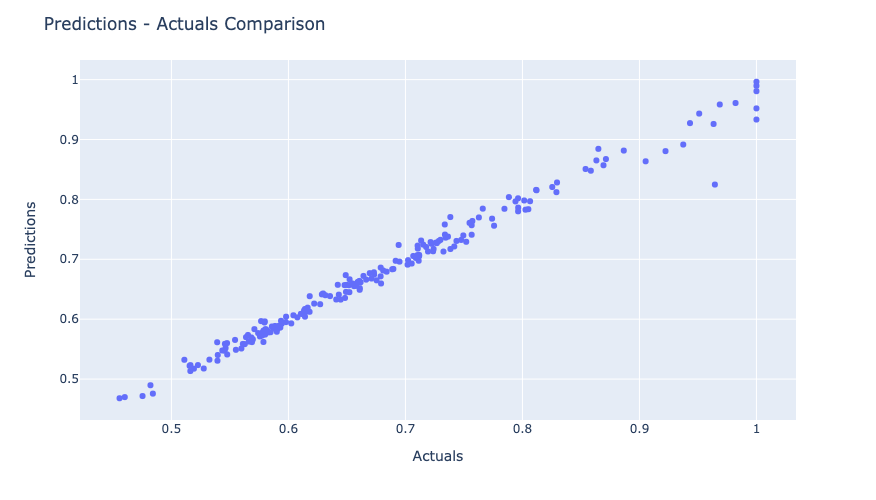

In [24]:
fig = px.scatter(res, x="Actuals", y="Predictions")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Predictions - Actuals Comparison",
)

fig.show()

In [102]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.5834
Epoch 2/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 3/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 4/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 5/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 6/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 7/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 8/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 9/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 10/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 11/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 12/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 13/1000
25/25 [====

In [103]:
mean_squared_error(y_test, ann.predict(X_test), squared=False)

0.0199502927877566

In [116]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Predictions"] = pd.Series(prediction.ravel())
res_ann["Actuals"] = y_test.values
res_ann["Diff"] = res_ann.Predictions - res_ann.Actuals
res_ann

,Predictions,Actuals,Diff
0,0.741781,0.738444,0.003337
1,0.746105,0.733762,0.012343
2,0.720723,0.722304,-0.001580
3,0.537965,0.532461,0.005504
4,0.521350,0.516163,0.005186
...,...,...,...
195,0.707716,0.719291,-0.011575
196,0.651549,0.655715,-0.004166
197,0.586085,0.585884,0.000202
198,0.806921,0.805055,0.001865


In [118]:
res_ann.describe()

,Predictions,Actuals,Diff
count,200.000000,200.000000,200.000000
mean,0.677213,0.680477,-0.003264
std,0.116464,0.120284,0.019731
min,0.459425,0.455656,-0.118662
25%,0.585974,0.586770,-0.006696
50%,0.656343,0.660770,-0.001293
75%,0.738359,0.738383,0.004675
max,1.067363,1.000000,0.067363


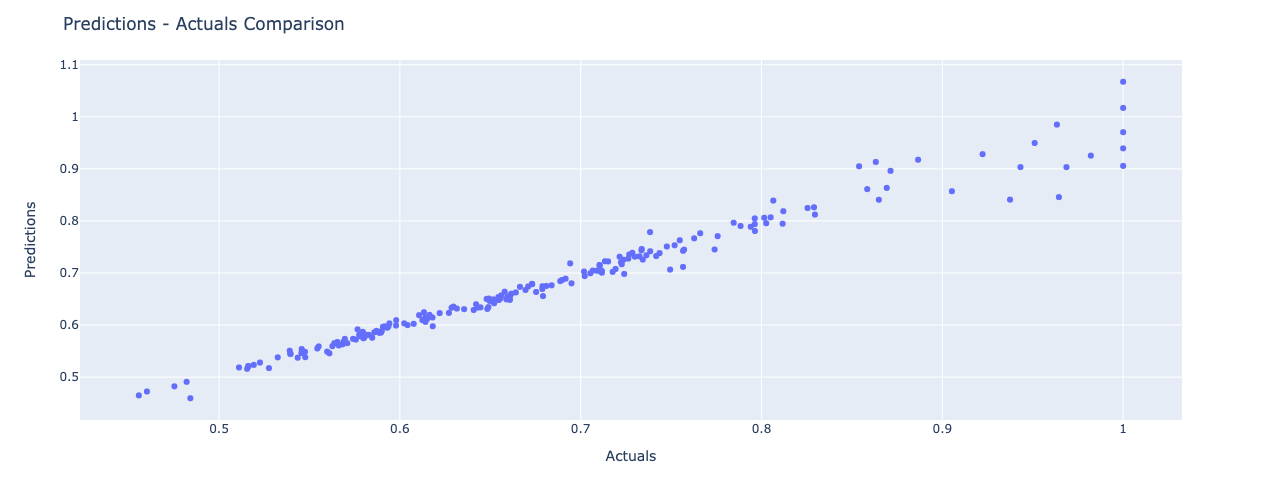

In [119]:
fig = px.scatter(res_ann, x="Actuals", y="Predictions")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Predictions - Actuals Comparison",
)

fig.show()